In [224]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [225]:
# Load the data
file_path = Path("Resources/crypto_data.csv")
df_crypto_data = pd.read_csv(file_path, index_col=0)
df_crypto_data.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [226]:
df_crypto_data.shape

(1252, 6)

Discarded all cryptocurrencies that are not being traded. In other words, filtered for currencies that are currently being traded. Once this is done, dropped the 'IsTrading' column from the dataframe.

## Discarded all cryptocurrencies that are not being traded. 
## In other words, filtered for currencies that are currently being traded.


In [227]:
df_crypto_data.drop(df_crypto_data[df_crypto_data['IsTrading']==False].index,inplace=True)
df_crypto_data.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


## Dropped the IsTrading column from the dataframe.

In [228]:
df_crypto_data=df_crypto_data.drop('IsTrading', axis=1)

In [229]:
df_crypto_data.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


## Removed all rows that have at least one null value

In [230]:
# Check for Nulls
df_crypto_data.isna().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [231]:
# Delete rows with Nulls
df_crypto_data = df_crypto_data.dropna(how="any")
df_crypto_data

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


## Filtered for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.

In [232]:
df_crypto_data=df_crypto_data.loc[df_crypto_data['TotalCoinsMined']>0]
df_crypto_data

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


## deleted the CoinName from the original dataframe.
In order for the dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data, deleted the CoinName

In [233]:
# save the coin name to a new Dataframe first
df_crypto_coins = df_crypto_data['CoinName'].to_frame()
df_crypto_coins

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [234]:
# Delete the CoinName column
df_crypto_data = df_crypto_data.drop(['CoinName'],axis=1)


In [235]:
## checking datatypes of remaining fields
df_crypto_data.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [236]:
# We know for SURE that TotalCoinSupply should have been numeric . 
# Hence, converting TotalCoinSupply to numeric type 
df_crypto_data['TotalCoinSupply'] = df_crypto_data['TotalCoinSupply'].apply(pd.to_numeric)
df_crypto_data

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
1337,X13,PoW/PoS,2.927942e+10,3.141593e+11
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07
ETH,Ethash,PoW,1.076842e+08,0.000000e+00
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2.000000e+09
GAP,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
BDX,CryptoNight,PoW,9.802226e+08,1.400223e+09
ZEN,Equihash,PoW,7.296538e+06,2.100000e+07


#### Checking to make sure there are no duplicates for the features 'Algorithm' and 'ProofType'
#### For complex datasets , we dont want to assume that if matching words with Upper/Lower case are same unless we have Domain Knowledge. So I will check for leading , trailing spaces and by converting to lowercase but I will only modify the original data by removing leading, trailing spaces but not to lower case. 

In [237]:
# Checking 'Algorithm'
disp_all_sorteda = df_crypto_data['Algorithm'].unique()
disp_all_sorteda.sort()
disp_all_sorteda

# At a glace values look ok but if we have a bigger list of features , 
# it would be difficult to clean this way so let's code it

array(['1GB AES Pattern Search', '536', 'Argon2d', 'BLAKE256', 'Blake',
       'Blake2S', 'Blake2b', 'C11', 'Cloverhash', 'Counterparty',
       'CryptoNight', 'CryptoNight Heavy', 'CryptoNight-V7',
       'Cryptonight-GPU', 'DPoS', 'Dagger', 'Dagger-Hashimoto',
       'ECC 256K1', 'Equihash', 'Equihash+Scrypt', 'Ethash', 'Exosis',
       'Green Protocol', 'Groestl', 'HMQ1725', 'HybridScryptHash256',
       'IMesh', 'Jump Consistent Hash', 'Keccak', 'Leased POS', 'Lyra2RE',
       'Lyra2REv2', 'Lyra2Z', 'M7 POW', 'Multiple', 'NIST5', 'NeoScrypt',
       'Ouroboros', 'PHI1612', 'POS 2.0', 'POS 3.0', 'PoS',
       'Proof-of-Authority', 'Proof-of-BibleHash', 'QUAIT', 'QuBit',
       'Quark', 'SHA-256', 'SHA-256 + Hive', 'SHA-256D', 'SHA-512',
       'SHA3', 'Scrypt', 'Semux BFT consensus', 'Shabal256', 'Skein',
       'SkunkHash', 'SkunkHash v2 Raptor', 'Stanford Folding', 'TRC10',
       'Time Travel', 'Tribus', 'VBFT', 'VeChainThor Authority', 'X11',
       'X11GOST', 'X13', 'X14', 'X15

In [238]:
# Checking to make sure there are no duplicates for the feature 'Algorithm'
# by trimming all leading , trailing spaces 

Algorithm = df_crypto_data['Algorithm'].str.strip()
# Algorithm = df_crypto_data['Algorithm'].str.lower() # Not sure if we should do this without domain knowledge
Algorithm = Algorithm.unique()
Algorithm.sort()

if (df_crypto_data['Algorithm'].nunique() == len(Algorithm)):
    print ("No duplicates found for the feature 'Algorithm'")
else:
    print (f"{Algorithm['ProofType'].nunique()-len(Algorithm)} duplicates found for the feature 'ProofType'")
    df_crypto_data['Algorithm'] = df_crypto_data['Algorithm'].str.strip()
    # df_crypto_data['Algorithm'] = df_crypto_data['Algorithm'].str.lower()
    
# print (sorted(df_crypto_data['Algorithm'].unique()))

No duplicates found for the feature 'Algorithm'


In [239]:
# Checking 'ProofType'
disp_all_sorted = df_crypto_data['ProofType'].unique()
disp_all_sorted.sort()
disp_all_sorted

# we can see here "'DPOS', 'DPoS'", "'PoW/PoS', 'PoW/PoS '" are duplicates
# if we have a bigger list of features , it would be difficult to clean this way so let's code it

array(['DPOS', 'DPoS', 'HPoW', 'LPoS', 'POBh', 'PoA', 'PoC', 'PoS',
       'PoS/LPoS', 'PoS/PoW', 'PoS/PoW/PoT', 'PoST', 'PoW', 'PoW + Hive',
       'PoW and PoS', 'PoW/PoS', 'PoW/PoS ', 'PoW/PoW', 'PoW/nPoS', 'Pos',
       'Proof of Authority', 'Proof of Trust', 'TPoS',
       'Zero-Knowledge Proof', 'dPoW/PoW'], dtype=object)

In [240]:
# Checking to make sure there are no duplicates for the feature 'ProofType'
# by trimming all leading , trailing spaces 

ProofType = df_crypto_data['ProofType'].str.strip()
# ProofType = df_crypto_data['ProofType'].str.lower() # Not sure if we should do this 
ProofType = ProofType.unique()
ProofType.sort()

if (df_crypto_data['ProofType'].nunique() == len(ProofType)):
    print ("No duplicates found for the feature 'ProofType'")
else:
    # {df_crypto_data['ProofType'].nunique()-len(ProofType)} 
    print ("Duplicates found for the feature 'ProofType' and have been handled")
    df_crypto_data['ProofType'] = df_crypto_data['ProofType'].str.strip()
    # df_crypto_data['ProofType'] = df_crypto_data['ProofType'].str.lower()

Duplicates found for the feature 'ProofType' and have been handled


In [241]:
# Not sure if we should do this without domain knowledge
# df_crypto_data.loc[df_crypto_data['ProofType']=='Proof of Authority', 'ProofType'] = 'PoA'
# df_crypto_data['ProofType'].nunique()

In [242]:
# Total number of new columns that will be generated once we convert features with text values
print(f"Total number of NEW columns that will be generated once we convert features with text values to numerical data : \
{df_crypto_data['Algorithm'].nunique() + df_crypto_data['ProofType'].nunique()}")

print(f"Total number of columns in the dataframe after crteating dummy variables : \
{2+df_crypto_data['Algorithm'].nunique() + df_crypto_data['ProofType'].nunique()}")


Total number of NEW columns that will be generated once we convert features with text values to numerical data : 95
Total number of columns in the dataframe after crteating dummy variables : 97


## converted the remaining features with text values, Algorithm and ProofType, into numerical data. To accomplish this task, uses Pandas to create dummy variables. 

In [243]:
df_crypto_data_dummies = pd.get_dummies(df_crypto_data, columns=['Algorithm', 'ProofType'])
df_crypto_data_dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW and PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Examine the number of rows and columns of the dataset now. How did they change?


In [244]:
# Shape of dataset after conversion.
print(f"Shape of dataset after conversion : {df_crypto_data_dummies.shape}")
print(f"No of rows : {(df_crypto_data_dummies.shape)[0]}")
print(f"No of columns : {(df_crypto_data_dummies.shape)[1]}")

Shape of dataset after conversion : (532, 97)
No of rows : 532
No of columns : 97


## Standardizing dataset so that columns that contain larger values do not unduly influence the outcome.

In [245]:
crypto_data_scaled = StandardScaler().fit_transform(df_crypto_data_dummies)
df_crypto_data_scaled = pd.DataFrame(crypto_data_scaled)
df_crypto_data_scaled.shape


(532, 97)

## Dimensionality Reduction with PCA

Preserved 90% of the explained variance in dimensionality reduction by setting n_components=0.90

In [246]:
# Initialize PCA model
pca = PCA(n_components=0.90)

In [247]:

# Get principal components for the data.
crypto_data_pca = pca.fit_transform(crypto_data_scaled)

 How did the number of the features change?

In [248]:
print(f"Shape after performing dimensionality reduction with PCA : {crypto_data_pca.shape}")
print(f"No of features after performing dimensionality reduction with PCA: {(crypto_data_pca.shape)[1]}")

Shape after performing dimensionality reduction with PCA : (532, 74)
No of features after performing dimensionality reduction with PCA: 74


In [249]:
# Converting to Dataframe while preserving the index
df_crypto_data_pca = pd.DataFrame(crypto_data_pca,index=df_crypto_data_dummies.index)
# df_crypto_data_pca


## t-SNE model to further reduce the dataset dimensions

In [250]:
# Initialize t-SNE model
tsne = TSNE()

Ran t-SNE on the principal components: the output of the PCA transformation.

In [251]:
# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_data_pca)

In [252]:
tsne_features.shape

(532, 2)

In [253]:
# Transform t-SNE data to a DataFrame
# tsne_features_df = pd.DataFrame(tsne_features, index=df_crypto_data_pca.index)
tsne_features_df = pd.DataFrame(
    data=tsne_features, columns=["t-SNE feature 1", "t-SNE feature 2"], index=df_crypto_data_pca.index
)
tsne_features_df

,t-SNE feature 1,t-SNE feature 2
42,2.081024,19.192532
404,-4.464222,15.764330
1337,-2.424106,27.843742
BTC,35.658348,-10.814728
ETH,-12.730494,-16.429754
...,...,...
ZEPH,29.704205,-11.785475
GAP,-1.168709,13.736502
BDX,-23.690308,-3.215637
ZEN,-18.231466,-11.526525


In [254]:
x = tsne_features[:,0]  #all rows 1st col
y = tsne_features[:,1]  #all rows 2nd col

## scatter plot of the t-SNE output

Text(0.5, 1.0, 'Cryptocurrency Clusters')

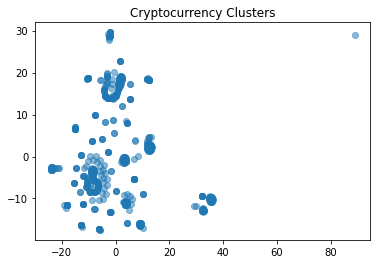

In [255]:
plt.scatter(x,y, alpha=0.5)
plt.title("Cryptocurrency Clusters")

**I can see 3 clusters forming, may be 4.** Lets create an elbow plot to identify the best number of clusters.

## k-means with t-SNE Data - The Elbow Method

In [256]:
inertia = []
k = range(1, 11)

## for-loop is to create a list of inertias for each k from 1 to 10, inclusive.


In [257]:

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)


C:\Users\vmuty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


## plot to examine any elbows that exist


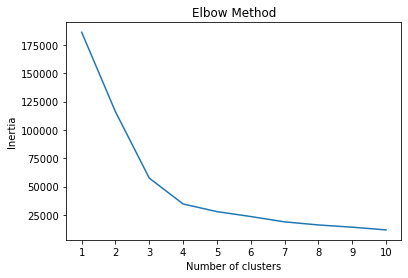

In [258]:

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## Looks like there is a clear elbow at k = 4. 
* I ran this code multple times and ended up with 4 clusters majority of the time.


Lets predict and get the lablels

In [259]:
# Predicting clusters with k=4

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(tsne_features)

# Predict clusters
predictions = model.predict(tsne_features)

In [260]:

# Add the predicted cluster column to the dataframe (name it class)
tsne_features_df["class"] = model.labels_
tsne_features_df["class"].unique()

array([1, 2, 0, 3])

In [261]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_cryptos_df = pd.concat([df_crypto_data, tsne_features_df], axis=1, sort=False)
clustered_cryptos_df["CoinName"] = df_crypto_coins["CoinName"]

# print(clustered_cryptos_df.shape)
# clustered_cryptos_df.head(4)

## Sample Report of Cryptocurrencies on the trading market and their predicted clusters

In [262]:
#Tradable cryptos
clustered_cryptos_df = clustered_cryptos_df[
    [
        "CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "class"]
    ]
clustered_cryptos_df.sample(32).sort_values(by='class', ascending=False)

,CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,class
KUSH,KushCoin,X11,PoW/PoS,9.354000e+06,5.659097e+06,3
BOLI,BolivarCoin,X11,PoW,2.500000e+07,1.365408e+07,3
JMC,Junson Ming Chan Coin,X11,PoS,0.000000e+00,1.720992e+10,3
HWC,HollyWoodCoin,Scrypt,PoS,2.600000e+07,3.870681e+07,3
BSD,BitSend,X11,PoW/PoS,1.390000e+08,2.438772e+07,3
SPR,Spreadcoin,X11,PoW,2.000000e+07,1.114973e+07,3
STCN,Stakecoin,PoS,PoS,6.159996e+07,4.000000e+06,3
DIEM,CarpeDiemCoin,SHA-256,PoW,2.162628e+10,2.173997e+10,2
BSV,Bitcoin SV,SHA-256,PoW,2.100000e+07,1.799251e+07,2
BWS,BitcoinWSpectrum,SHA-256,PoS,1.002622e+08,5.781100e+07,2


In [263]:
# Number of Cryptocurrencies per class
clustered_cryptos_df['class'].value_counts()

0    205
1    148
3    129
2     50
Name: class, dtype: int64

## Visualize Clusters

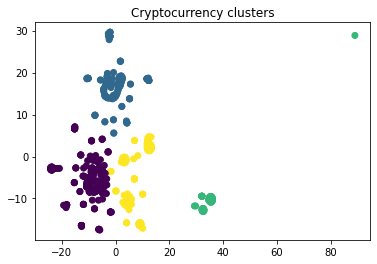

In [264]:
plt.scatter(x=tsne_features_df['t-SNE feature 1'], y=tsne_features_df['t-SNE feature 2'], c=tsne_features_df['class'])
plt.title('Cryptocurrency clusters')
plt.show()

Having executed the code multiple times by trying out different parameters, and arriving at the same result, and based on KMeans elbow plot, we can conclude that there are 4 distinct cryptocurrency clusters in the data.  

These clusters can be used to create a classification system for new investment.